In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model 
#import statsmodels.tsa.stattools
from pandas.core import datetools

pd.options.mode.chained_assignment = None
import datetime

C:\Users\joonho.ye\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
data = pd.read_excel('DataFileAssignmentUpdated.xls')
data = data[(data.Year < '2011-12-31')]
data.index=data['Year']
data.drop('Year', axis=1, inplace=True)
data.head(5)

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,PoisonFemale,SuicideAll,SuicideMale,SuicideFemale,AssaultAll,AssaultMale,AssaultFemale,OtherAll,OtherMale,OtherFemale
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,ALBANIA,2967000.0,1631850.0,1335150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-12-31,ALBANIA,3029800.0,1666390.0,1363410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-31,ALBANIA,3092600.0,1700930.0,1391670.0,305.0,236.0,69.0,31.0,26.0,5.0,...,0.0,73.0,48.0,25.0,44.0,34.0,10.0,154.0,118.0,36.0
1988-12-31,ALBANIA,3155400.0,1735470.0,1419930.0,303.0,242.0,61.0,39.0,28.0,11.0,...,0.0,63.0,41.0,22.0,49.0,40.0,9.0,181.0,132.0,49.0
1989-12-31,ALBANIA,3218200.0,1770010.0,1448190.0,356.0,280.0,76.0,28.0,23.0,5.0,...,0.0,68.0,53.0,15.0,69.0,51.0,18.0,177.0,139.0,38.0


In [3]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [4]:
data.describe()

,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,DrowingAll,...,PoisonFemale,SuicideAll,SuicideMale,SuicideFemale,AssaultAll,AssaultMale,AssaultFemale,OtherAll,OtherMale,OtherFemale
count,3.588000e+03,3.588000e+03,3.588000e+03,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,...,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,1.646761e+07,8.674634e+06,7.792979e+06,2412.019231,1825.309643,586.709588,944.305741,519.316890,424.988852,572.132386,...,203.948439,2071.969621,1582.570513,489.399108,1408.559365,1188.063266,220.496098,3084.141862,2223.267280,860.874582
std,3.507952e+07,1.846147e+07,1.661923e+07,6218.243002,4613.697607,1640.249367,2301.709172,1233.615457,1146.052921,1638.849265,...,1098.514503,6088.034151,4746.406584,1402.203994,5307.608053,4579.733751,861.145657,8285.277171,6273.866054,2156.276308
min,2.000000e+03,1.070000e+03,9.300000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.211500e+05,2.219670e+05,2.002252e+05,43.000000,34.000000,9.000000,9.000000,6.000000,2.000000,12.000000,...,1.000000,17.000000,13.000000,4.000000,11.000000,9.000000,2.000000,53.000000,38.000000,16.000000
50%,4.333400e+06,2.294678e+06,2.037860e+06,406.500000,314.000000,90.000000,99.000000,69.000000,29.000000,82.000000,...,14.000000,240.500000,181.000000,53.000000,103.000000,73.000000,27.000000,527.500000,360.500000,137.000000
75%,1.283355e+07,6.649371e+06,6.129380e+06,1865.750000,1421.500000,419.000000,685.250000,417.000000,245.250000,331.500000,...,78.000000,1302.500000,962.250000,304.250000,485.000000,351.000000,104.000000,1861.750000,1267.500000,660.000000
max,3.098760e+08,1.626849e+08,1.471911e+08,51855.000000,36712.000000,15325.000000,26014.000000,13053.000000,12961.000000,20458.000000,...,17475.000000,61886.000000,51464.000000,10673.000000,52243.000000,47777.000000,11297.000000,104611.000000,82215.000000,22476.000000


In [5]:
r = 100000
data['TotalPopRev'] = round(data.TotalPop/ r , 1)
data['PopMaleRev'] = round(data.PopMale/r , 1)
data['PopFemaleRev'] = round(data.PopFemale/r , 1)
data['TransportAccAllRev'] = round(data.TransportAccAll*r / data.TotalPop, 1)
data['TransportAccMaleRev'] = round(data.TransportAccMale*r / data.TotalPop, 1)
data['TransportAccFemaleRev'] = round(data.TransportAccFemale*r / data.TotalPop, 1)
data['FallsAllRev'] = round(data.FallsAll*r / data.TotalPop, 1)
data['FallsMaleRev'] = round(data.FallsMale*r / data.TotalPop, 1)
data['FallsFemaleRev'] = round(data.FallsFemale*r / data.TotalPop, 1)
data['DrowingAllRev'] = round(data.DrowingAll*r / data.TotalPop, 1)
data['DrowningMaleRev'] = round(data.DrowningMale*r / data.TotalPop, 1)
data['DrowningFemaleRev'] = round(data.DrowningFemale*r / data.TotalPop, 1)
data['FireAllRev'] = round(data.FireAll*r / data.TotalPop, 1)
data['FireMaleRev'] = round(data.FireMale*r / data.TotalPop, 1)
data['FireFemaleRev'] = round(data.FireFemale*r / data.TotalPop, 1)
data['PoisonAllRev'] = round(data.PoisonAll*r / data.TotalPop, 1)
data['PoisonMaleRev'] = round(data.PoisonMale*r / data.TotalPop, 1)
data['PoisonFemaleRev'] = round(data.PoisonFemale*r / data.TotalPop, 1)
data['SuicideAllRev'] = round(data.SuicideAll*r / data.TotalPop, 1)
data['SuicideMaleRev'] = round(data.SuicideMale*r / data.TotalPop, 1)
data['SuicideFemaleRev'] = round(data.SuicideFemale*r / data.TotalPop, 1)
data['AssaultAllRev'] = round(data.AssaultAll*r / data.TotalPop, 1)
data['AssaultMaleRev'] = round(data.AssaultMale*r / data.TotalPop, 1)
data['AssaultFemaleRev'] = round(data.AssaultFemale*r / data.TotalPop, 1)
data['OtherAllRev'] = round(data.OtherAll*r / data.TotalPop, 1)
data['OtherMaleRev'] = round(data.OtherMale*r / data.TotalPop, 1)
data['OtherFemaleRev'] = round(data.OtherFemale*r / data.TotalPop, 1)
data.head()

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,PoisonFemaleRev,SuicideAllRev,SuicideMaleRev,SuicideFemaleRev,AssaultAllRev,AssaultMaleRev,AssaultFemaleRev,OtherAllRev,OtherMaleRev,OtherFemaleRev
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,ALBANIA,2967000.0,1631850.0,1335150.0,305.0,236.0,69.0,31.0,26.0,5.0,...,0.0,2.5,1.6,0.8,1.5,1.1,0.3,5.2,4.0,1.2
1986-12-31,ALBANIA,3029800.0,1666390.0,1363410.0,305.0,236.0,69.0,31.0,26.0,5.0,...,0.0,2.4,1.6,0.8,1.5,1.1,0.3,5.1,3.9,1.2
1987-12-31,ALBANIA,3092600.0,1700930.0,1391670.0,305.0,236.0,69.0,31.0,26.0,5.0,...,0.0,2.4,1.6,0.8,1.4,1.1,0.3,5.0,3.8,1.2
1988-12-31,ALBANIA,3155400.0,1735470.0,1419930.0,303.0,242.0,61.0,39.0,28.0,11.0,...,0.0,2.0,1.3,0.7,1.6,1.3,0.3,5.7,4.2,1.6
1989-12-31,ALBANIA,3218200.0,1770010.0,1448190.0,356.0,280.0,76.0,28.0,23.0,5.0,...,0.0,2.1,1.6,0.5,2.1,1.6,0.6,5.5,4.3,1.2


In [6]:
data.to_excel(r'DataFileAssignment_Rev.xls')

In [7]:
ld = list(data)
ld

['Country',
 'TotalPop',
 'PopMale',
 'PopFemale',
 'TransportAccAll',
 'TransportAccMale',
 'TransportAccFemale',
 'FallsAll',
 'FallsMale',
 'FallsFemale',
 'DrowingAll',
 'DrowningMale',
 'DrowningFemale',
 'FireAll',
 'FireMale',
 'FireFemale',
 'PoisonAll',
 'PoisonMale',
 'PoisonFemale',
 'SuicideAll',
 'SuicideMale',
 'SuicideFemale',
 'AssaultAll',
 'AssaultMale',
 'AssaultFemale',
 'OtherAll',
 'OtherMale',
 'OtherFemale',
 'TotalPopRev',
 'PopMaleRev',
 'PopFemaleRev',
 'TransportAccAllRev',
 'TransportAccMaleRev',
 'TransportAccFemaleRev',
 'FallsAllRev',
 'FallsMaleRev',
 'FallsFemaleRev',
 'DrowingAllRev',
 'DrowningMaleRev',
 'DrowningFemaleRev',
 'FireAllRev',
 'FireMaleRev',
 'FireFemaleRev',
 'PoisonAllRev',
 'PoisonMaleRev',
 'PoisonFemaleRev',
 'SuicideAllRev',
 'SuicideMaleRev',
 'SuicideFemaleRev',
 'AssaultAllRev',
 'AssaultMaleRev',
 'AssaultFemaleRev',
 'OtherAllRev',
 'OtherMaleRev',
 'OtherFemaleRev']

In [8]:
Intl = pd.DataFrame(columns=[])
Intl['PopMaleRev'] = data.groupby(['Year'])['PopMaleRev'].transform('mean')
Intl['PopFemaleRev'] = data.groupby(['Year'])['PopFemaleRev'].transform('mean')
Intl['TotalPopRev'] = data.groupby(['Year'])['TotalPopRev'].transform('mean')
Intl['TransportAccMaleRev'] = data.groupby(['Year'])['TransportAccMaleRev'].transform('mean')
Intl['TransportAccFemaleRev'] = data.groupby(['Year'])['TransportAccFemaleRev'].transform('mean')
Intl['TransportAccAllRev'] = data.groupby(['Year'])['TransportAccAllRev'].transform('mean')
Intl['FallsMaleRev'] = data.groupby(['Year'])['FallsMaleRev'].transform('mean')
Intl['FallsFemaleRev'] = data.groupby(['Year'])['FallsFemaleRev'].transform('mean')
Intl['FallsAllRev'] = data.groupby(['Year'])['FallsAllRev'].transform('mean')
Intl['AssaultMaleRev'] = data.groupby(['Year'])['AssaultMaleRev'].transform('mean')
Intl['AssaultFemaleRev'] = data.groupby(['Year'])['AssaultFemaleRev'].transform('mean')
Intl['AssaultAllRev'] = data.groupby(['Year'])['AssaultAllRev'].transform('mean')
Intl['SuicideMaleRev'] = data.groupby(['Year'])['SuicideMaleRev'].transform('mean')
Intl['SuicideFemaleRev'] = data.groupby(['Year'])['SuicideFemaleRev'].transform('mean')
Intl['SuicideAllRev'] = data.groupby(['Year'])['SuicideAllRev'].transform('mean')
Intl['OtherMaleRev'] = data.groupby(['Year'])['OtherMaleRev'].transform('mean')
Intl['OtherFemaleRev'] = data.groupby(['Year'])['OtherFemaleRev'].transform('mean')
Intl['OtherAllRev'] = data.groupby(['Year'])['OtherAllRev'].transform('mean')
Intl['FireMaleRev'] = data.groupby(['Year'])['FireMaleRev'].transform('mean')
Intl['FireFemaleRev'] = data.groupby(['Year'])['FireFemaleRev'].transform('mean')
Intl['FireAllRev'] = data.groupby(['Year'])['FireAllRev'].transform('mean')
Intl['PoisonMaleRev'] = data.groupby(['Year'])['PoisonMaleRev'].transform('mean')
Intl['PoisonFemaleRev'] = data.groupby(['Year'])['PoisonFemaleRev'].transform('mean')
Intl['PoisonAllRev'] = data.groupby(['Year'])['PoisonAllRev'].transform('mean')
Intl['DrowningMaleRev'] = data.groupby(['Year'])['PoisonMaleRev'].transform('mean')
Intl['DrowningFemaleRev'] = data.groupby(['Year'])['PoisonFemaleRev'].transform('mean')
Intl['DrowingAllRev'] = data.groupby(['Year'])['PoisonAllRev'].transform('mean')
Intl.head()

,PopMaleRev,PopFemaleRev,TotalPopRev,TransportAccMaleRev,TransportAccFemaleRev,TransportAccAllRev,FallsMaleRev,FallsFemaleRev,FallsAllRev,AssaultMaleRev,...,OtherAllRev,FireMaleRev,FireFemaleRev,FireAllRev,PoisonMaleRev,PoisonFemaleRev,PoisonAllRev,DrowningMaleRev,DrowningFemaleRev,DrowingAllRev
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,75.702174,67.960870,143.664493,901.492029,286.486232,1187.977536,257.376087,152.580435,409.957971,919.852174,...,2089.350000,149.552899,66.035507,215.593478,578.350000,178.441304,756.799275,578.350000,178.441304,756.799275
1986-12-31,76.663043,68.834783,145.497826,206.965217,67.559420,274.523188,87.860145,89.718841,177.580435,113.660870,...,418.705797,30.085507,13.644928,43.726812,97.592754,34.892029,132.489855,97.592754,34.892029,132.489855
1987-12-31,77.632609,69.699275,147.325362,198.792754,65.687681,264.479710,86.357971,88.323188,174.679710,112.344203,...,400.179710,30.507971,13.704348,44.215217,94.680435,33.722464,128.413768,94.680435,33.722464,128.413768
1988-12-31,78.591304,70.564493,149.157971,191.508696,63.832609,255.348551,85.176087,85.031159,170.207971,107.100000,...,388.992754,29.720290,13.265217,42.981884,93.232609,33.294203,126.532609,93.232609,33.294203,126.532609
1989-12-31,79.555797,71.434783,150.988406,193.263768,64.939855,258.207971,86.500725,89.808696,176.310870,108.126812,...,383.091304,29.637681,14.168841,43.806522,92.553623,32.715217,125.273188,92.553623,32.715217,125.273188


In [9]:
Intld = Intl[1:26]

In [10]:
Intld.to_excel(r'DataFileAssignment_Intl.xls')

In [11]:
Canada = data.loc[data['Country']=='CANADA']
USA = data.loc[data['Country']=='UNITED STATES OF AMERICA']

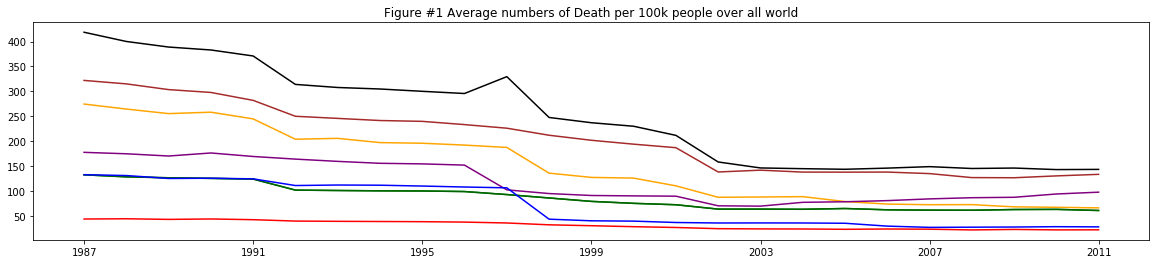

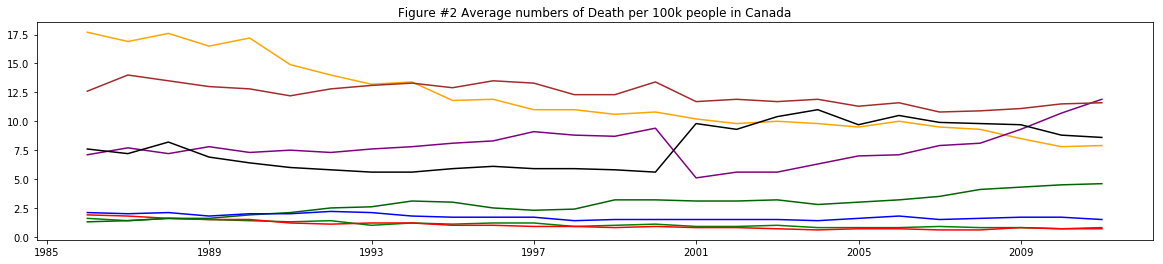

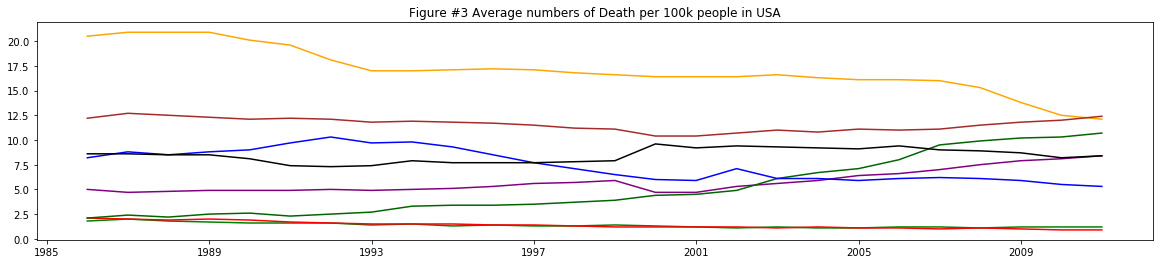

In [12]:
plt.figure(figsize=(20,4))
plt.title("Figure #1 Average numbers of Death per 100k people over all world")
plt.plot(Intld['TransportAccAllRev'], color = 'orange')
plt.plot(Intld['FallsAllRev'], color = 'purple')
plt.plot(Intld['DrowingAllRev'], color = 'green')
plt.plot(Intld['FireAllRev'], color = 'red')
plt.plot(Intld['PoisonAllRev'], color = 'darkgreen')
plt.plot(Intld['SuicideAllRev'], color = 'brown')
plt.plot(Intld['AssaultAllRev'], color = 'blue')
plt.plot(Intld['OtherAllRev'], color = 'k')
plt.show()
plt.figure(figsize=(20,4))
plt.title("Figure #2 Average numbers of Death per 100k people in Canada")
plt.plot(Canada['TransportAccAllRev'], color = 'orange')
plt.plot(Canada['FallsAllRev'], color = 'purple')
plt.plot(Canada['DrowingAllRev'], color = 'green')
plt.plot(Canada['FireAllRev'], color = 'red')
plt.plot(Canada['PoisonAllRev'], color = 'darkgreen')
plt.plot(Canada['SuicideAllRev'], color = 'brown')
plt.plot(Canada['AssaultAllRev'], color = 'blue')
plt.plot(Canada['OtherAllRev'], color = 'k')
plt.show()
plt.figure(figsize=(20,4))
plt.title("Figure #3 Average numbers of Death per 100k people in USA")
plt.plot(USA['TransportAccAllRev'], color = 'orange')
plt.plot(USA['FallsAllRev'], color = 'purple')
plt.plot(USA['DrowingAllRev'], color = 'green')
plt.plot(USA['FireAllRev'], color = 'red')
plt.plot(USA['PoisonAllRev'], color = 'darkgreen')
plt.plot(USA['SuicideAllRev'], color = 'brown')
plt.plot(USA['AssaultAllRev'], color = 'blue')
plt.plot(USA['OtherAllRev'], color = 'k')
plt.show()

Poison:

    Agricultural chemicals /
    Industrial chemicals /
    Drugs and health care products /
    Poisons of biological origin /
    Radiation
    


Q1: What is the predicted transportation death number of 2011?

Q2: When the death number of poison cross over the death number of transportation?

In [ ]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [16]:
linear_mod = linear_model.LinearRegression()
dates = list(Canada.index.year)
numTA = list(Canada.TransportAccAllRev)

In [19]:
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

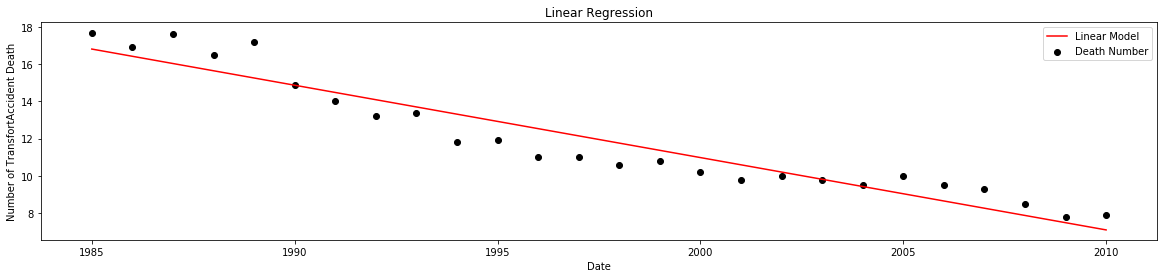

In [20]:
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of TransfortAccident Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [21]:
y = 2011
y_ = y -1
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the last three years' transport accident death is " , numTA[-3], numTA[-2], numTA[-4] )
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
#print("coefficient : ", coefficient)

the last three years' transport accident death is  [ 8.5] [ 7.8] [ 9.3]
the predicted numebr of transport accident death in  2011  :  6.7


In [22]:
y = 2012
predicted_numTA = linear_mod.predict(y)[0][0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
y = 2013
predicted_numTA = linear_mod.predict(y)[0][0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
y = 2014
predicted_numTA = linear_mod.predict(y)[0][0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )

the predicted numebr of transport accident death in  2012  :  6.3
the predicted numebr of transport accident death in  2013  :  5.9
the predicted numebr of transport accident death in  2014  :  5.5


# time series #

In [73]:
type(Canada)
cd = Canada.drop(['Country',
 'TotalPop',
 'PopMale',
 'PopFemale',
 'TransportAccAll',
 'TransportAccMale',
 'TransportAccFemale',
 'FallsAll',
 'FallsMale',
 'FallsFemale',
 'DrowingAll',
 'DrowningMale',
 'DrowningFemale',
 'FireAll',
 'FireMale',
 'FireFemale',
 'PoisonAll',
 'PoisonMale',
 'PoisonFemale',
 'SuicideAll',
 'SuicideMale',
 'SuicideFemale',
 'AssaultAll',
 'AssaultMale',
 'AssaultFemale',
 'OtherAll',
 'OtherMale',
 'OtherFemale',
 'TotalPopRev',
 'PopMaleRev',
 'PopFemaleRev',
 'TransportAccMaleRev',
 'TransportAccFemaleRev',
 'FallsAllRev',
 'FallsMaleRev',
 'FallsFemaleRev',
 'DrowingAllRev',
 'DrowningMaleRev',
 'DrowningFemaleRev',
 'FireAllRev',
 'FireMaleRev',
 'FireFemaleRev',
 'PoisonAllRev',
 'PoisonMaleRev',
 'PoisonFemaleRev',
 'SuicideAllRev',
 'SuicideMaleRev',
 'SuicideFemaleRev',
 'AssaultAllRev',
 'AssaultMaleRev',
 'AssaultFemaleRev',
 'OtherAllRev',
 'OtherMaleRev',
 'OtherFemaleRev'], axis = 1)

cd

,TransportAccAllRev,Eins
Year,,
1985-12-31,17.7,1.0
1986-12-31,16.9,1.0
1987-12-31,17.6,1.0
1988-12-31,16.5,1.0
1989-12-31,17.2,1.0
1990-12-31,14.9,1.0
1991-12-31,14.0,1.0
1992-12-31,13.2,1.0
1993-12-31,13.4,1.0


In [21]:
from pandas.core import datetools
import pandas.tseries
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=3,center=False).mean()

    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=3,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

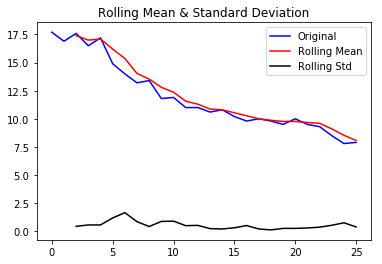

Results of Dickey-Fuller Test:
Test Statistic                 -1.403004
p-value                         0.580835
#Lags Used                      1.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [22]:
ts = map(lambda x: x[0], numTA)
s = pd.Series(ts)
test_stationarity(s)

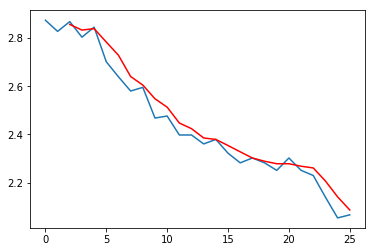

In [26]:
s_log = np.log(s)
moving_avg = pd.Series.rolling(s_log, 3).mean()
plt.plot(s_log)
plt.plot(moving_avg, color='red')

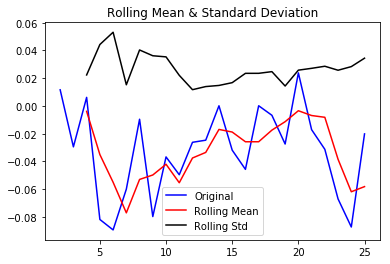

Results of Dickey-Fuller Test:
Test Statistic                 -3.972419
p-value                         0.001562
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [27]:
s_log_moving_avg_diff = s_log - moving_avg
s_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(s_log_moving_avg_diff)

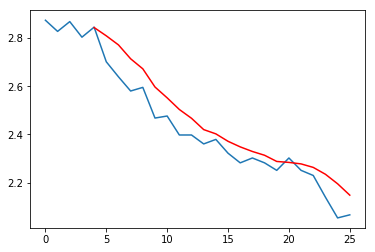

In [28]:
moving_avg = pd.Series.rolling(s_log, 5).mean()
plt.plot(s_log)
plt.plot(moving_avg, color='red')

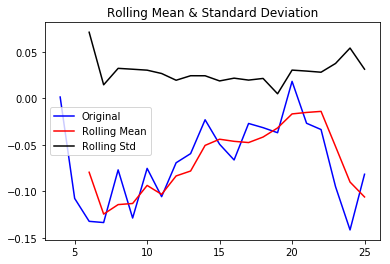

Results of Dickey-Fuller Test:
Test Statistic                 -2.867160
p-value                         0.049302
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [29]:
s_log_moving_avg_diff = s_log - moving_avg
s_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(s_log_moving_avg_diff)

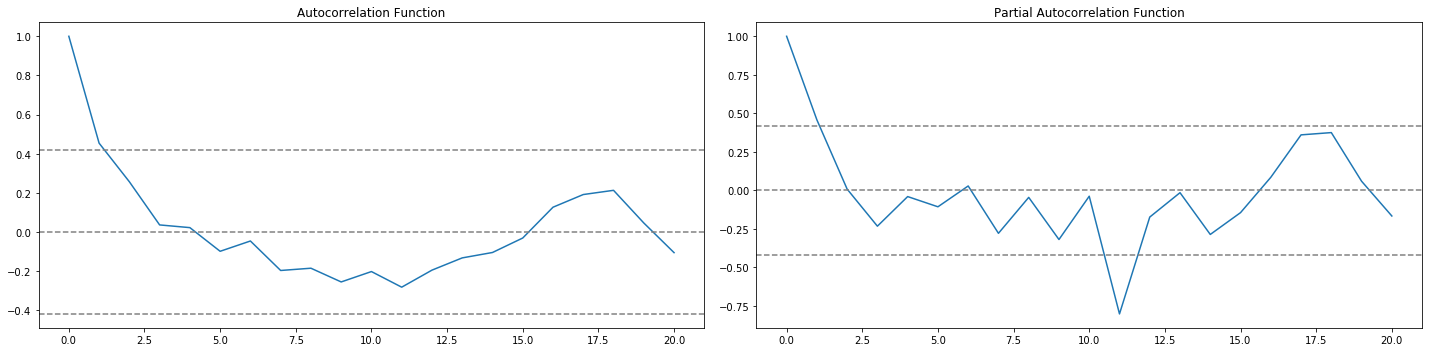

In [36]:
plt.figure(figsize=(20,5))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(s_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(s_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(s_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(s_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()